Ë¶ã„Å§„Åã„Å£„Åü‰∏çÂÖ∑Âêà(1)<br>
„Çπ„Éà„É©„É≥„Éâ„Ååa,a*„Åó„Åã„Å™„ÅÑ„ÄÅ„ÅÇ„Çã„ÅÑ„ÅØb,b*„Åó„Åã„Å™„ÅÑÂ†¥Âêà„ÄÅ*_peppercorn_output.pil„Å´ÁÑ°„ÅÑÊñπ„ÅÆ„Çπ„Éà„É©„É≥„ÉâÈï∑„ÅåÊõ∏„Åã„Çå„Å™„ÅÑ„ÅÆ„Åß„ÄÅmain.py„Åå„ÅÜ„Åæ„Åè„Éï„Ç°„Ç§„É´„ÇíË™≠„ÅøÂèñ„Çå„Åö„Å´Â§±Êïó„Åô„Çã„ÄÇ<br><br>
Ë¶ã„Å§„Åã„Å£„Åü‰∏çÂÖ∑Âêà(2)<br>
peppercorn„Åå„Åù„ÅÆ„Çπ„Éà„É©„É≥„ÉâÁµÑ„ÅøÂêà„Çè„Åõ„ÅßÊßãÈÄ†„ÇíÁô∫Ë¶ã„Åß„Åç„Åö„ÄÅ„Ç®„Éç„É´„ÇÆ„Éº„ÅÆÂÄ§„ÇíÊåÅ„Åü„Å™„ÅÑenergy_log.csv,oxdna_energy_mean.csv„Å†„Åë„ÅåÊÆã„ÇãÂ†¥Âêà„Åå„ÅÇ„Çã„ÄÇ

2023/9/4<br>
strands.csv„ÇíÁîüÊàê„Åó„Å¶Ë°å„ÅÜÂá¶ÁêÜ„ÅØÈÉΩÂêà„ÅåÊÇ™„ÅÑ„ÅÆ„Åß„ÄÅ‰Ωø„Çè„Å™„ÅÑÊñπÂêë„Å´‰øÆÊ≠£„ÇíË©¶„Åø„Çã„ÄÇ

In [90]:
import os
import importlib
import warnings
warnings.filterwarnings('ignore')
import use_pickle
importlib.reload(use_pickle)
import make_filepath
importlib.reload(make_filepath)
import glob
import pandas as pd
#from contextlib import redirect_stdout
#with redirect_stdout(open(<Âá∫ÂäõÂÖà„Éë„Çπ>), 'w')): Âá¶ÁêÜ
import traceback
import time
import datetime
import sys
import shutil

In [91]:
import get_untrusted
importlib.reload(get_untrusted)
import qdpy_result_to_strands
importlib.reload(qdpy_result_to_strands)
import run_peppercorn
importlib.reload(run_peppercorn)
import run_oxdna
importlib.reload(run_oxdna)
import pil_to_strands
importlib.reload(pil_to_strands)
import send_mail
importlib.reload(send_mail)
import check_structures
importlib.reload(check_structures)

<module 'check_structures' from '/Users/takepy/takeoxdna/kakenhievolvedna2/oxdna_run/check_structures.py'>

In [92]:
def send_test_loop_mail(flag,error_message,start_datetime,end_datetime,elapsed_time):
    if flag == "okey":
        importlib.reload(send_mail)
        textlist = ["üéâüéâüéâPython program  „Äêtest_loop„Äë completed!üéâüéâüéâ","\n",
                    "‚è∞START: ",start_datetime,"\n",
                    "‚è∞END: ",end_datetime,"\n",
                    "‚åõÔ∏èRUN TIME: ",str(elapsed_time)," s \n",
                    "üìÉMESSAGE: ",error_message]
        text = "".join(textlist)
        send_mail.program_complete_mail(mail_title = "üêç„ÄêÂÆüË°åÂÆå‰∫Ü„Äë Python„Éó„É≠„Ç∞„É©„É†„Äêtest_loop„Äë „ÅåÂÆå‰∫Ü„Åó„Åæ„Åó„ÅüÔºÅüêç",mailtext = text)
    else:
        importlib.reload(send_mail)
        textlist = ["üò≠üò≠Python program „Äêtest_loop„Äë has ERROR!üò≠üò≠","\n",
                    "‚è∞START: ",start_datetime,"\n",
                    "‚è∞END: ",end_datetime,"\n",
                    "‚åõÔ∏èRUN TIME: ",str(elapsed_time)," s \n",
                    "üìÉMESSAGE: ",error_message]
        text = "".join(textlist)
        send_mail.program_complete_mail(mail_title = "üêç„ÄêÂÆüË°å„Ç®„É©„Éº„Äë Python„Éó„É≠„Ç∞„É©„É† „Äêtest_loop„Äë „Åß„Ç®„É©„Éº„ÅåÁô∫Áîü„Åó„Åæ„Åó„Åüüêç",mailtext = text)

In [93]:
def concat_abs(binary_energy_df):
    qdpy_oxdna_abs = abs(
        binary_energy_df.loc[:,"qdpy_bootstrap_energy_mean"] - \
        binary_energy_df.loc[:,"oxdna_energy_mean"]
    ).rename("qdpy_oxdna_abs")
    
    return pd.concat(
        [binary_energy_df,#.loc[:,"qdpy_bootstrap_energy_mean":"oxdna_energy_mean"],
         qdpy_oxdna_abs],
        axis=1)

In [94]:
def choose_best_abs(binary_energy_df_abs,ratio=0.7):
    return binary_energy_df_abs.\
        dropna(how='any').\
        sort_values(by="qdpy_oxdna_abs", ascending=True).\
        head(int(len(binary_energy_df_abs)*ratio))

In [95]:
def get_untrusted_strands(source_dir,loop_dir):
    untrusted_df = get_untrusted.qdpy_to_untrusted_strands(source_dir,loop_dir,500)
    untrusted_tetrad = qdpy_result_to_strands.tf_to_tetrad(untrusted_df.iloc[:,:256].values)
    untrusted_strands = qdpy_result_to_strands.tetrad_to_strand(untrusted_tetrad)
        #qdpy„Å´„Çà„Çä„ÄÅÈÖçÁΩÆ„Åï„Çå„Åü„Çπ„Éà„É©„É≥„Éâ„ÅÆÊÉÖÂ†±„Å®„Ç®„Éç„É´„ÇÆ„Éº„ÅÆÊÉÖÂ†±„ÅåÂæó„Çâ„Çå„Çã„ÄÇ
        #ÁîüÊàê„Åï„Çå„Åü„Éï„Ç°„Ç§„É´„ÅØloop_dir„Å´ÁΩÆ„Åã„Çå„Çã„ÄÇ
        
    return untrusted_df,untrusted_strands

In [96]:
#make_new_train_data„ÅØÁîüÊàêÂÖÉ„Å®ÁîüÊàêÂÖà„ÅÆ„Éá„Ç£„É¨„ÇØ„Éà„É™„ÄÅ„Çπ„Éà„É©„É≥„Éâ„ÅÆÈï∑„Åï„ÄÅÊßãÈÄ†„Çµ„Ç§„Ç∫„ÅÆÊúÄÂ§ßÂÄ§„ÇíÂèó„ÅëÂèñ„Çã„ÄÇ
#Ëøî„ÇäÂÄ§„ÅØÊñ∞„Åó„Åè„É¢„Éá„É´„Å´‰∏é„Åà„Çãx,y„ÅÆ„Éà„É¨„Éº„Éã„É≥„Ç∞Áî®„Éá„Éº„Çø„Åß„ÅÇ„Çã„ÄÇ

def make_new_train_data(strands_df,source_dir,loop_dir,
                        length_a,length_b,max_complex_size,
                        oxdna_input_filename):

    x_train,x_test,y_train,y_test,\
        untrusted_df,qdpy_binary,\
            qdpy_tetrad,qdpy_strands = get_untrusted.get_untrusted_binary_and_energy(
                strands_df,source_dir,loop_dir,qdpy_bgt=1000)
        #qdpy„Å´„Çà„Çä„ÄÅÈÖçÁΩÆ„Åï„Çå„Åü„Çπ„Éà„É©„É≥„Éâ„ÅÆÊÉÖÂ†±„Å®„Ç®„Éç„É´„ÇÆ„Éº„ÅÆÊÉÖÂ†±„ÅåÂæó„Çâ„Çå„Çã„ÄÇ
        #ÁîüÊàê„Åï„Çå„Åü„Éï„Ç°„Ç§„É´„ÅØloop_dir„Å´ÁΩÆ„Åã„Çå„Çã„ÄÇ
    use_pickle.dump_to_pickle(loop_dir,[x_train,x_test,y_train,y_test],["x_train","x_test","y_train","y_test"])
    
    use_pickle.dump_to_pickle(loop_dir,[strands_df],["strands_df"])
    use_pickle.dump_to_pickle(loop_dir,[untrusted_df],["untrusted_df"])

    untrusted_strands = qdpy_result_to_strands.tetrad_to_strand(
        qdpy_result_to_strands.tf_to_tetrad(untrusted_df.iloc[:,0:256].values))
    
    untrusted_peppercorn_folders = run_peppercorn.run_peppercorn_for_list(
        # qdpy_strands,
        untrusted_strands,
        untrusted_df.index,
        #strands_df.loc[:,"strand_set_num"].values,
        length_a,length_b,max_complex_size,loop_dir)
    
    run_oxdna.run_oxdna_for_folders_list(untrusted_peppercorn_folders,
                                         loop_dir+"/run_oxdna_log.txt",
                                         oxdna_input_filename
                                         )


    untrusted_oxdna_energy_means = []
    for untrusted_idx in untrusted_df.index:
        energy_mean_path = os.path.join(loop_dir,
                    "untrusted_strands_set{}".format(str(untrusted_idx)),
                    "oxdna_outputs".format(str(untrusted_idx)),
                    "oxdna_energy_mean.csv")
        if os.path.exists(energy_mean_path):
            energy_mean = float(pd.read_csv(energy_mean_path).values[0])#oxdna„ÅåË®àÁÆó„Åó„ÅüÁµêÊûú„ÅÆÂπ≥Âùá„ÄÇ
            untrusted_oxdna_energy_means.append(energy_mean)

        else:
            untrusted_oxdna_energy_means.append(None)#ÊßãÈÄ†„ÅåË¶ã„Å§„Åã„Çâ„Å™„Åã„Å£„ÅüÂ†¥Âêà„ÅÆÁµêÊûú„Åß„ÅÇ„Çã„ÄÇ

    energy_means_df = pd.DataFrame(untrusted_oxdna_energy_means)
    energy_means_df.columns = ["oxdna_energy_mean"]
    energy_means_df.index = untrusted_df.index#energy_means_df„Å®untrusted_df„ÅÆ‰∏¶„Å≥È†Ü„ÅåÂêå„Åò„Åß„ÅÇ„Çã„Åì„Å®„ÇíÊòéÁ§∫„Åó„Å¶„ÅÑ„Çã„ÄÇ
    binary_energy_df = pd.concat([untrusted_df,energy_means_df],axis=1)

    additional_x_train = binary_energy_df.dropna(how='any').iloc[:,0:256]#ÂÜçÂ≠¶ÁøíÂØæË±°„Å´ËøΩÂä†„Åó„Åü„ÅÑ„Éá„Éº„Çø„ÄÇNone„Å´„Å™„Å£„Å¶„ÅÑ„ÇãÈÉ®ÂàÜ„ÅØÈô§Â§ñ„ÄÇ
    additional_y_train = binary_energy_df.dropna(how='any').loc[:,"oxdna_energy_mean"]#ÂÜçÂ≠¶ÁøíÂØæË±°„Å´ËøΩÂä†„Åó„Åü„ÅÑ„Éá„Éº„Çø„ÄÇ
    # new_x_train = pd.concat([use_pickle.read_pickle(loop_dir+"/x_train.p"),additional_x_train],axis=0).reset_index(drop=True)
    # new_y_train = pd.concat([use_pickle.read_pickle(loop_dir+"/y_train.p"),additional_y_train],axis=0).reset_index(drop=True)
    new_x_train = pd.concat([x_train,additional_x_train],axis=0).reset_index(drop=True)
    new_y_train = pd.concat([y_train,additional_y_train],axis=0).reset_index(drop=True)
    #oxDNA„Åó„ÅüÁµêÊûú„ÅØ‰ªä„ÅÆ„Å®„Åì„ÇçÂÖ®„Å¶ÂÜçÂ≠¶Áøí„Å´‰Ωø„ÅÜ„ÄÇ
    return new_x_train,new_y_train,binary_energy_df

In [97]:
def run_loop(output_dir,first_source_dir,
             length_a,length_b,max_complex_size,loop_num,
             oxdna_input_filename="input_relax_1e7"):
    #ÊôÇÈñìË®àÊ∏¨ÈñãÂßã
    t1 = time.time()
    starttime = datetime.datetime.fromtimestamp(time.time())
    start_datetime = starttime.strftime('%Y/%m/%d %H:%M:%S')
    
    #ÊôÇÈñì„ÇíÂÖÉ„Å´„ÄÅÁµêÊûú„Éï„Ç©„É´„ÉÄ‰ΩúÊàê
    results_dir = make_filepath.make_datetime_folder(output_dir)
    #‰æã:2023-07-31/20230802_1925

    #ÊåáÂÆöÂõûÊï∞„Å†„Åë„ÄÅË®àÁÆóÁµêÊûú„Éï„Ç°„Ç§„É´ÁîüÊàê„ÅÆ‰∏ÄÈÄ£„ÅÆÈÅéÁ®ã„ÇíÂÆüË°å„Åô„Çã„ÄÇ
    
    for count in range(loop_num):
        try:
            #pil„Éï„Ç°„Ç§„É´„ÅÆ‰∏ÄË¶ß„ÇíÂèñÂæó„Åô„Çã„ÄÇ
            if count == 0:
                source_dir = first_source_dir
                loop_dir = make_filepath.make_count_folder(results_dir,count)
                #‰æã:2023-07-31/20230802_1925/loop0
                source_pilfile_path_list = glob.glob(os.path.join(source_dir,"sim_result_peppercorn*","*_result.pil"))
                
            else:
                source_dir = os.path.join(results_dir,"loop"+str(count-1))
                loop_dir = make_filepath.make_count_folder(results_dir,count)
                source_pilfile_path_list = glob.glob(os.path.join(source_dir,"untrusted_strands_set*","peppercorn_output.pil"))

            #ÂèñÂæó„Åó„Åü„Éï„Ç°„Ç§„É´„Çí„ÇÇ„Å®„Å´„ÄÅ„Çπ„Éà„É©„É≥„Éâ„ÅÆ„Éá„Éº„Çø„Çí„Åæ„Å®„ÇÅ„Çã„ÄÇ

            print("source_pilfile_path_list:\n")
            display(source_pilfile_path_list)

            strands_df = pil_to_strands.get_all_strands(source_pilfile_path_list)#strand_num,strand_set_id,strand_set_num,pilfile_path

            display(strands_df)
            
            
            new_x_train,new_y_train,binary_energy_df = make_new_train_data(
                strands_df,source_dir,loop_dir,
                length_a,length_b,max_complex_size,
                oxdna_input_filename)

            binary_energy_df_abs = concat_abs(binary_energy_df)
            oxdna_repertoire = choose_best_abs(binary_energy_df_abs,ratio=0.7)

            next_dir = make_filepath.make_count_folder(results_dir,count+1)
            use_pickle.dump_to_pickle(make_filepath.make_count_folder(results_dir,count+1),
                                    [new_x_train,new_y_train],
                                    ["x_train","y_train"]) 
            # shutil.copy(loop_dir+"/x_test.p",next_dir)
            # shutil.copy(loop_dir+"/y_test.p",next_dir)
            use_pickle.dump_to_pickle(loop_dir,[oxdna_repertoire],["oxdna_repertoire"])
            flag = "okey"
            error_message = "Succeeded!"
            
        except Exception as e:
            flag = str(e)
            error_message = traceback.format_exc()
            print(error_message)
            t2 = time.time()
            elapsed_time = t2-t1
            endtime = datetime.datetime.fromtimestamp(time.time())
            end_datetime = endtime.strftime('%Y/%m/%d %H:%M:%S')
            send_test_loop_mail(flag,error_message,start_datetime,end_datetime,elapsed_time)
            return 0
            
        
        count = count + 1


#„Ç®„É©„Éº„ÅåËµ∑„Åì„Å£„ÅüÂ†¥Âêà„ÅÆÂá¶ÁêÜ

    #ÁµÇ‰∫ÜÊôÇÂàª„ÇíÊ±Ç„ÇÅ„ÄÅÂÆüË°åÊôÇÈñì„Çí„ÅØ„Åã„Çã„ÄÇ
    t2 = time.time()
    elapsed_time = t2-t1
    endtime = datetime.datetime.fromtimestamp(time.time())
    end_datetime = endtime.strftime('%Y/%m/%d %H:%M:%S')
    #ÁµÇ‰∫Ü„ÇíÈÄöÁü•„Åô„Çã„ÄÇ
    send_test_loop_mail(flag,error_message,start_datetime,end_datetime,elapsed_time)

    
    # check_structures.count_structures(output_dir,
    #                                   os.path.basename(results_dir),loop_num)

In [98]:
def main(args):
    output_dir = args[1]
    first_source_dir = args[2]
    length_a = int(args[3])
    length_b = int(args[4])
    max_complex_size = int(args[5])
    loop_num = int(args[6])
    oxdna_input_filename = args[7]
    run_loop(output_dir,first_source_dir,
             length_a,length_b,max_complex_size,loop_num,
             oxdna_input_filename)

source_pilfile_path_list:



['20230904_0000/sim_result_peppercorn_2022-12-19_21_40_29833963/0020_result.pil',
 '20230904_0000/sim_result_peppercorn_2022-12-19_21_56_36509379/0007_result.pil',
 '20230904_0000/sim_result_peppercorn_2022-12-19_21_58_14663161/0015_result.pil',
 '20230904_0000/sim_result_peppercorn_2022-12-19_21_55_35367237/0013_result.pil',
 '20230904_0000/sim_result_peppercorn_2022-12-19_21_42_49735508/0030_result.pil',
 '20230904_0000/sim_result_peppercorn_2022-12-19_21_51_37172207/0017_result.pil',
 '20230904_0000/sim_result_peppercorn_2022-12-19_21_46_25897742/0014_result.pil',
 '20230904_0000/sim_result_peppercorn_2022-12-19_21_36_49652412/0014_result.pil',
 '20230904_0000/sim_result_peppercorn_2022-12-19_21_44_00734003/0036_result.pil',
 '20230904_0000/sim_result_peppercorn_2022-12-19_22_00_25774786/0004_result.pil',
 '20230904_0000/sim_result_peppercorn_2022-12-19_21_45_43742850/0018_result.pil',
 '20230904_0000/sim_result_peppercorn_2022-12-19_21_54_23793562/0028_result.pil',
 '20230904_0000/

path: 20230904_0000/sim_result_peppercorn_2022-12-19_21_40_29833963/0020_result.pil
[['s0', '0002', 2, ['a', 'a', 'a', 'a*'], '20230904_0000/sim_result_peppercorn_2022-12-19_21_40_29833963/0020_result.pil'], ['s1', '1010', 68, ['b', 'a', 'b', 'a'], '20230904_0000/sim_result_peppercorn_2022-12-19_21_40_29833963/0020_result.pil'], ['s2', '3232', 238, ['b*', 'a*', 'b*', 'a*'], '20230904_0000/sim_result_peppercorn_2022-12-19_21_40_29833963/0020_result.pil']]
[['s0', '0002', 2, ['a', 'a', 'a', 'a*'], '20230904_0000/sim_result_peppercorn_2022-12-19_21_40_29833963/0020_result.pil'], ['s1', '1010', 68, ['b', 'a', 'b', 'a'], '20230904_0000/sim_result_peppercorn_2022-12-19_21_40_29833963/0020_result.pil'], ['s2', '3232', 238, ['b*', 'a*', 'b*', 'a*'], '20230904_0000/sim_result_peppercorn_2022-12-19_21_40_29833963/0020_result.pil']]
[['s0', '0002', 2, ['a', 'a', 'a', 'a*'], '20230904_0000/sim_result_peppercorn_2022-12-19_21_40_29833963/0020_result.pil'], ['s1', '1010', 68, ['b', 'a', 'b', 'a'], '

 20230904_0000/sim_result_peppercorn_2022-12-19_21_45_43742850/0018_result.pil
[['s0', '0010', 4, ['a', 'a', 'b', 'a'], '20230904_0000/sim_result_peppercorn_2022-12-19_21_45_43742850/0018_result.pil'], ['s2', '0020', 8, ['a', 'a', 'a*', 'a'], '20230904_0000/sim_result_peppercorn_2022-12-19_21_45_43742850/0018_result.pil'], ['s3', '0030', 12, ['a', 'a', 'b*', 'a'], '20230904_0000/sim_result_peppercorn_2022-12-19_21_45_43742850/0018_result.pil'], ['s4', '0032', 14, ['a', 'a', 'b*', 'a*'], '20230904_0000/sim_result_peppercorn_2022-12-19_21_45_43742850/0018_result.pil'], ['s1', '0013', 7, ['a', 'a', 'b', 'b*'], '20230904_0000/sim_result_peppercorn_2022-12-19_21_45_43742850/0018_result.pil']]
[['s0', '0010', 4, ['a', 'a', 'b', 'a'], '20230904_0000/sim_result_peppercorn_2022-12-19_21_45_43742850/0018_result.pil'], ['s2', '0020', 8, ['a', 'a', 'a*', 'a'], '20230904_0000/sim_result_peppercorn_2022-12-19_21_45_43742850/0018_result.pil'], ['s3', '0030', 12, ['a', 'a', 'b*', 'a'], '20230904_0000/

strand_num strand_set_id  strand_set_num        strand_set  \
0         s0          0002               2     [a, a, a, a*]   
1         s1          1010              68      [b, a, b, a]   
2         s2          3232             238  [b*, a*, b*, a*]   
0         s0          2201             161    [a*, a*, a, b]   
1         s1          1231             109    [b, a*, b*, b]   
2         s2          2003             131    [a*, a, a, b*]   
3         s3          1301             113     [b, b*, a, b]   
4         s4          2210             164    [a*, a*, b, a]   
0         s0          1031              77     [b, a, b*, b]   
1         s1          3231             237   [b*, a*, b*, b]   
2         s2          2220             168   [a*, a*, a*, a]   
0         s0          2030             140    [a*, a, b*, a]   
1         s1          2203             163   [a*, a*, a, b*]   
2         s2          1321             121    [b, b*, a*, b]   
3         s3          0333              63   [a, b*, b*, b*]   
0         s0          0121              25     [a, b, a*, b]   
1         s1          0321              57    [a, b*, a*, b]   
2         s2          0323              59   [a, b*, a*, b*]   
3         s3          3221             233   [b*, a*, a*, b]   
0         s0          0010               4      [a, a, b, a]   
1         s1          0030              12     [a, a, b*, a]   
2         s3          0032              14    [a, a, b*, a*]   
3         s2          0031              13     [a, a, b*, b]   
0         s0          0003               3     [a, a, a, b*]   
1         s1          0011               5      [a, a, b, b]   
2         s2          0032              14    [a, a, b*, a*]   
0         s0          0101              17      [a, b, a, b]   
1         s3          2323             187  [a*, b*, a*, b*]   
2         s4          3232             238  [b*, a*, b*, a*]   
3         s1          1322             122   [b, b*, a*, a*]   
4         s2          2002             130    [a*, a, a, a*]   
0         s0          0000               0      [a, a, a, a]   
1         s2          1100              80      [b, b, a, a]   
2         s3          3030             204    [b*, a, b*, a]   
3         s4          3300             240    [b*, b*, a, a]   
4         s1          0231              45    [a, a*, b*, b]   
5         s5          3320             248   [b*, b*, a*, a]   
0         s0          3212             230   [b*, a*, b, a*]   
1         s1          3002             194    [b*, a, a, a*]   
2         s2          3321             249   [b*, b*, a*, b]   
3         s3          1333             127   [b, b*, b*, b*]   
0         s0          0010               4      [a, a, b, a]   
1         s2          0020               8     [a, a, a*, a]   
2         s3          0030              12     [a, a, b*, a]   
3         s4          0032              14    [a, a, b*, a*]   
4         s1          0013               7     [a, a, b, b*]   
0         s0          1321             121    [b, b*, a*, b]   
1         s1          0200              32     [a, a*, a, a]   
2         s2          1233             111   [b, a*, b*, b*]   
3         s4          1031              77     [b, a, b*, b]   
4         s5          2201             161    [a*, a*, a, b]   
5         s3          2131             157    [a*, b, b*, b]   
0         s0          0010               4      [a, a, b, a]   
1         s1          2011             133     [a*, a, b, b]   
2         s2          1302             114    [b, b*, a, a*]   
0         s0          0003               3     [a, a, a, b*]   
1         s1          0010               4      [a, a, b, a]   
2         s2          0012               6     [a, a, b, a*]   
3         s4          0023              11    [a, a, a*, b*]   
4         s3          0013               7     [a, a, b, b*]   

                                        pilfile_path  
0  20230904_0000/sim_result_peppercorn_202

C: 0.03125, Epsion: 0.0009765625, Gamma: 0.0078125
saved :  20230904_0000/20230919_1305/loop0/empty_svm.p
saved :  20230904_0000/20230919_1305/loop0/untrusted_qdpy_data.p
saved :  20230904_0000/20230919_1305/loop0/x_train.p
saved :  20230904_0000/20230919_1305/loop0/x_test.p
saved :  20230904_0000/20230919_1305/loop0/y_train.p
saved :  20230904_0000/20230919_1305/loop0/y_test.p
saved :  20230904_0000/20230919_1305/loop0/strands_df.p
saved :  20230904_0000/20230919_1305/loop0/untrusted_df.p
saved :  20230904_0000/20230919_1305/loop1/x_train.p
saved :  20230904_0000/20230919_1305/loop1/y_train.p
saved :  20230904_0000/20230919_1305/loop0/oxdna_repertoire.p
source_pilfile_path_list:



['20230904_0000/20230919_1305/loop0/untrusted_strands_set11/peppercorn_output.pil',
 '20230904_0000/20230919_1305/loop0/untrusted_strands_set16/peppercorn_output.pil',
 '20230904_0000/20230919_1305/loop0/untrusted_strands_set20/peppercorn_output.pil',
 '20230904_0000/20230919_1305/loop0/untrusted_strands_set42/peppercorn_output.pil',
 '20230904_0000/20230919_1305/loop0/untrusted_strands_set34/peppercorn_output.pil',
 '20230904_0000/20230919_1305/loop0/untrusted_strands_set6/peppercorn_output.pil',
 '20230904_0000/20230919_1305/loop0/untrusted_strands_set1/peppercorn_output.pil',
 '20230904_0000/20230919_1305/loop0/untrusted_strands_set47/peppercorn_output.pil',
 '20230904_0000/20230919_1305/loop0/untrusted_strands_set49/peppercorn_output.pil',
 '20230904_0000/20230919_1305/loop0/untrusted_strands_set46/peppercorn_output.pil',
 '20230904_0000/20230919_1305/loop0/untrusted_strands_set41/peppercorn_output.pil',
 '20230904_0000/20230919_1305/loop0/untrusted_strands_set15/peppercorn_output.

path: 20230904_0000/20230919_1305/loop0/untrusted_strands_set11/peppercorn_output.pil
[['s0', '1130', 92, ['b', 'b', 'b*', 'a'], '20230904_0000/20230919_1305/loop0/untrusted_strands_set11/peppercorn_output.pil'], ['s1', '3010', 196, ['b*', 'a', 'b', 'a'], '20230904_0000/20230919_1305/loop0/untrusted_strands_set11/peppercorn_output.pil']]
[['s0', '1130', 92, ['b', 'b', 'b*', 'a'], '20230904_0000/20230919_1305/loop0/untrusted_strands_set11/peppercorn_output.pil'], ['s1', '3010', 196, ['b*', 'a', 'b', 'a'], '20230904_0000/20230919_1305/loop0/untrusted_strands_set11/peppercorn_output.pil']]
path: 20230904_0000/20230919_1305/loop0/untrusted_strands_set16/peppercorn_output.pil
[['s0', '1232', 110, ['b', 'a*', 'b*', 'a*'], '20230904_0000/20230919_1305/loop0/untrusted_strands_set16/peppercorn_output.pil'], ['s1', '1303', 115, ['b', 'b*', 'a', 'b*'], '20230904_0000/20230919_1305/loop0/untrusted_strands_set16/peppercorn_output.pil']]
[['s0', '1232', 110, ['b', 'a*', 'b*', 'a*'], '20230904_0000/2

strand_num strand_set_id  strand_set_num       strand_set  \
0         s0          1130              92    [b, b, b*, a]   
1         s1          3010             196    [b*, a, b, a]   
0         s0          1232             110  [b, a*, b*, a*]   
1         s1          1303             115   [b, b*, a, b*]   
0         s0          1130              92    [b, b, b*, a]   
1         s1          3010             196    [b*, a, b, a]   
0         s0          0020               8    [a, a, a*, a]   
1         s1          2102             146   [a*, b, a, a*]   
0         s0          1030              76    [b, a, b*, a]   
1         s1          3010             196    [b*, a, b, a]   
0         s1          2110             148    [a*, b, b, a]   
1         s0          1113              87    [b, b, b, b*]   
2         s2          3302             242  [b*, b*, a, a*]   
0         s2          2110             148    [a*, b, b, a]   
1         s0          1113              87    [b, b, b, b*]   
2         s1          2031             141   [a*, a, b*, b]   
3         s3          3302             242  [b*, b*, a, a*]   
0         s0          1232             110  [b, a*, b*, a*]   
1         s1          1303             115   [b, b*, a, b*]   
0         s2          2121             153   [a*, b, a*, b]   
1         s0          1232             110  [b, a*, b*, a*]   
2         s1          1303             115   [b, b*, a, b*]   
0         s0          1030              76    [b, a, b*, a]   
1         s1          1130              92    [b, b, b*, a]   
2         s2          3010             196    [b*, a, b, a]   
0         s0          1123              91   [b, b, a*, b*]   
0         s0          1123              91   [b, b, a*, b*]   
0         s0          1130              92    [b, b, b*, a]   
1         s1          3010             196    [b*, a, b, a]   
0         s0          3302             242  [b*, b*, a, a*]   
0         s0          0021               9    [a, a, a*, b]   
0         s2          2102             146   [a*, b, a, a*]   
1         s0          0201              33    [a, a*, a, b]   
2         s1          1021              73    [b, a, a*, b]   
3         s3          3010             196    [b*, a, b, a]   
0         s0          3010             196    [b*, a, b, a]   
0         s0          1123              91   [b, b, a*, b*]   
1         s1          2231             173  [a*, a*, b*, b]   
0         s0          1113              87    [b, b, b, b*]   
0         s0          1101              81     [b, b, a, b]   
1         s1          1322             122  [b, b*, a*, a*]   
2         s2          2113             151   [a*, b, b, b*]   
3         s3          3012             198   [b*, a, b, a*]   

                                        pilfile_path  
0  20230904_0000/20230919_1305/loop0/untrusted_st...  
1  20230904_0000/20230919_1305/loop0/untrusted_st...  
0  20230904_0000/20230919_1305/loop0/untrusted_st...  
1  20230904_0000/20230919_1305/loop0/untrusted_st...  
0  20230904_0000/20230919_1305/loop0/untrusted_st...  
1  20230904_0000/20230919_1305/loop0/untrusted_st...  
0  20230904_0000/20230919_1305/loop0/untrusted_st...  
1  20230904_0000/20230919_1305/loop0/untrusted_st...  
0  20230904_0000/20230919_1305/loop0/untrusted_st...  
1  20230904_0000/20230919_1305/loop0/untrusted_st...  
0  20230904_0000/20230919_1305/loop0/untrusted_st...  
1  20230904_0000/20230919_1305/loop0/untrusted_st...  
2  20230904_0000/20230919_1305/loop0/untrusted_st...  
0  20230904_0000/20230919_1305/loop0/untrusted_st...  
1  20230904_0000/20230919_1305/loop0/untrusted_st...  
2  20230904_0000/20230919_1305/loop0/untrusted_st...  
3  20230904_0000/20230919_1305/loop0/untrusted_st...  
0  20230904_0000/20230919_1305/loop0/untrusted_st...  
1  20230904_0000/20230919_1305/loop0/untrusted_st...  
0  20230904_0000/20230919_1305/loop0/untrusted_st...  
1  20230904_0000/20230919_1305/loop0/untrusted_st...  
2  20230904_0000/20

C: 0.03125, Epsion: 0.0009765625, Gamma: 0.0078125
saved :  20230904_0000/20230919_1305/loop1/empty_svm.p
saved :  20230904_0000/20230919_1305/loop1/svm_train_result.p
saved :  20230904_0000/20230919_1305/loop1/svm_test_result.p
saved :  20230904_0000/20230919_1305/loop1/untrusted_qdpy_data.p
saved :  20230904_0000/20230919_1305/loop1/x_train.p
saved :  20230904_0000/20230919_1305/loop1/x_test.p
saved :  20230904_0000/20230919_1305/loop1/y_train.p
saved :  20230904_0000/20230919_1305/loop1/y_test.p
saved :  20230904_0000/20230919_1305/loop1/strands_df.p
saved :  20230904_0000/20230919_1305/loop1/untrusted_df.p
saved :  20230904_0000/20230919_1305/loop2/x_train.p
saved :  20230904_0000/20230919_1305/loop2/y_train.p
saved :  20230904_0000/20230919_1305/loop1/oxdna_repertoire.p
source_pilfile_path_list:



['20230904_0000/20230919_1305/loop1/untrusted_strands_set4/peppercorn_output.pil',
 '20230904_0000/20230919_1305/loop1/untrusted_strands_set26/peppercorn_output.pil',
 '20230904_0000/20230919_1305/loop1/untrusted_strands_set44/peppercorn_output.pil',
 '20230904_0000/20230919_1305/loop1/untrusted_strands_set72/peppercorn_output.pil',
 '20230904_0000/20230919_1305/loop1/untrusted_strands_set18/peppercorn_output.pil',
 '20230904_0000/20230919_1305/loop1/untrusted_strands_set89/peppercorn_output.pil',
 '20230904_0000/20230919_1305/loop1/untrusted_strands_set58/peppercorn_output.pil',
 '20230904_0000/20230919_1305/loop1/untrusted_strands_set94/peppercorn_output.pil',
 '20230904_0000/20230919_1305/loop1/untrusted_strands_set69/peppercorn_output.pil',
 '20230904_0000/20230919_1305/loop1/untrusted_strands_set57/peppercorn_output.pil',
 '20230904_0000/20230919_1305/loop1/untrusted_strands_set92/peppercorn_output.pil',
 '20230904_0000/20230919_1305/loop1/untrusted_strands_set59/peppercorn_output

path: 20230904_0000/20230919_1305/loop1/untrusted_strands_set4/peppercorn_output.pil
[['s0', '1130', 92, ['b', 'b', 'b*', 'a'], '20230904_0000/20230919_1305/loop1/untrusted_strands_set4/peppercorn_output.pil'], ['s1', '3010', 196, ['b*', 'a', 'b', 'a'], '20230904_0000/20230919_1305/loop1/untrusted_strands_set4/peppercorn_output.pil']]
[['s0', '1130', 92, ['b', 'b', 'b*', 'a'], '20230904_0000/20230919_1305/loop1/untrusted_strands_set4/peppercorn_output.pil'], ['s1', '3010', 196, ['b*', 'a', 'b', 'a'], '20230904_0000/20230919_1305/loop1/untrusted_strands_set4/peppercorn_output.pil']]
path: 20230904_0000/20230919_1305/loop1/untrusted_strands_set26/peppercorn_output.pil
[['s2', '2121', 153, ['a*', 'b', 'a*', 'b'], '20230904_0000/20230919_1305/loop1/untrusted_strands_set26/peppercorn_output.pil'], ['s0', '1232', 110, ['b', 'a*', 'b*', 'a*'], '20230904_0000/20230919_1305/loop1/untrusted_strands_set26/peppercorn_output.pil'], ['s1', '1303', 115, ['b', 'b*', 'a', 'b*'], '20230904_0000/20230919

strand_num strand_set_id  strand_set_num        strand_set  \
0         s0          1130              92     [b, b, b*, a]   
1         s1          3010             196     [b*, a, b, a]   
0         s2          2121             153    [a*, b, a*, b]   
1         s0          1232             110   [b, a*, b*, a*]   
2         s1          1303             115    [b, b*, a, b*]   
0         s0          1232             110   [b, a*, b*, a*]   
1         s1          1303             115    [b, b*, a, b*]   
0         s0          3302             242   [b*, b*, a, a*]   
0         s2          2102             146    [a*, b, a, a*]   
1         s0          0201              33     [a, a*, a, b]   
2         s1          1021              73     [b, a, a*, b]   
3         s3          3010             196     [b*, a, b, a]   
0         s0          1232             110   [b, a*, b*, a*]   
1         s1          1303             115    [b, b*, a, b*]   
0         s2          2121             153    [a*, b, a*, b]   
1         s0          1232             110   [b, a*, b*, a*]   
2         s1          1303             115    [b, b*, a, b*]   
0         s0          1030              76     [b, a, b*, a]   
1         s1          1130              92     [b, b, b*, a]   
2         s2          3010             196     [b*, a, b, a]   
0         s0          0101              17      [a, b, a, b]   
1         s3          2222             170  [a*, a*, a*, a*]   
2         s1          1021              73     [b, a, a*, b]   
3         s2          1311             117     [b, b*, b, b]   
0         s0          1113              87     [b, b, b, b*]   
0         s0          1030              76     [b, a, b*, a]   
1         s1          1130              92     [b, b, b*, a]   
2         s2          3010             196     [b*, a, b, a]   
0         s2          2233             175  [a*, a*, b*, b*]   
1         s0          1030              76     [b, a, b*, a]   
2         s1          1130              92     [b, b, b*, a]   
3         s3          3010             196     [b*, a, b, a]   
4         s4          3132             222   [b*, b, b*, a*]   
0         s0          1101              81      [b, b, a, b]   
1         s1          1322             122   [b, b*, a*, a*]   
2         s2          2113             151    [a*, b, b, b*]   
3         s3          3012             198    [b*, a, b, a*]   
0         s0          3302             242   [b*, b*, a, a*]   
0         s2          2110             148     [a*, b, b, a]   
1         s0          1113              87     [b, b, b, b*]   
2         s1          2031             141    [a*, a, b*, b]   
3         s3          3302             242   [b*, b*, a, a*]   
0         s0          1232             110   [b, a*, b*, a*]   
1         s1          1303             115    [b, b*, a, b*]   
0         s0          1130              92     [b, b, b*, a]   
1         s1          3010             196     [b*, a, b, a]   
0         s0          1030              76     [b, a, b*, a]   
1         s1          3010             196     [b*, a, b, a]   
0         s0          0102              18     [a, b, a, a*]   
1         s1          2000             128     [a*, a, a, a]   
0         s0          2233             175  [a*, a*, b*, b*]   
1         s3          3233             239  [b*, a*, b*, b*]   
2         s1          3010             196     [b*, a, b, a]   
3         s2          3132             222   [b*, b, b*, a*]   
0         s0          1030              76     [b, a, b*, a]   
1         s1          3010             196     [b*, a, b, a]   
0         s0          1232             110   [b, a*, b*, a*]   
1         s1          1303             115    [b, b*, a, b*]   
0         s0          1030              76     [b, a, b*, a]   
1         s1          1130              92     [b, b, b*, a]   
2         s2          3010             196     [b*, a, b, a]   
0         s2          2233        

C: 0.03125, Epsion: 0.0009765625, Gamma: 0.0078125
saved :  20230904_0000/20230919_1305/loop2/empty_svm.p
saved :  20230904_0000/20230919_1305/loop2/svm_train_result.p
saved :  20230904_0000/20230919_1305/loop2/svm_test_result.p
saved :  20230904_0000/20230919_1305/loop2/untrusted_qdpy_data.p
saved :  20230904_0000/20230919_1305/loop2/x_train.p
saved :  20230904_0000/20230919_1305/loop2/x_test.p
saved :  20230904_0000/20230919_1305/loop2/y_train.p
saved :  20230904_0000/20230919_1305/loop2/y_test.p
saved :  20230904_0000/20230919_1305/loop2/strands_df.p
saved :  20230904_0000/20230919_1305/loop2/untrusted_df.p
saved :  20230904_0000/20230919_1305/loop3/x_train.p
saved :  20230904_0000/20230919_1305/loop3/y_train.p
saved :  20230904_0000/20230919_1305/loop2/oxdna_repertoire.p


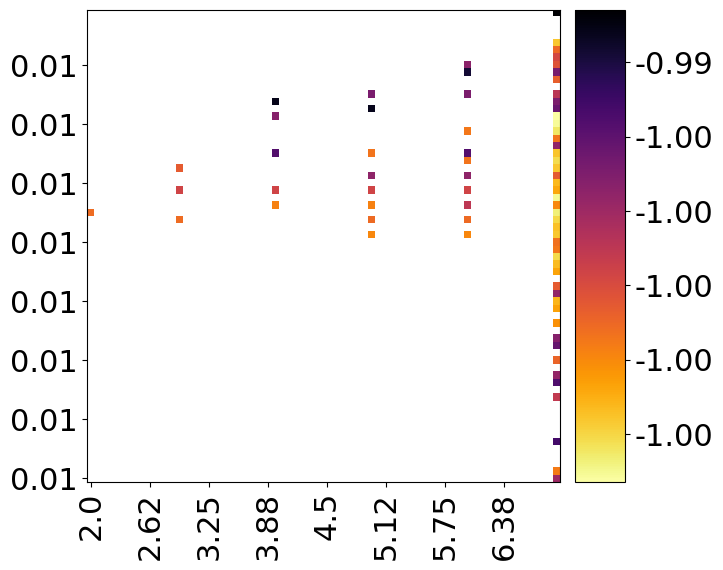

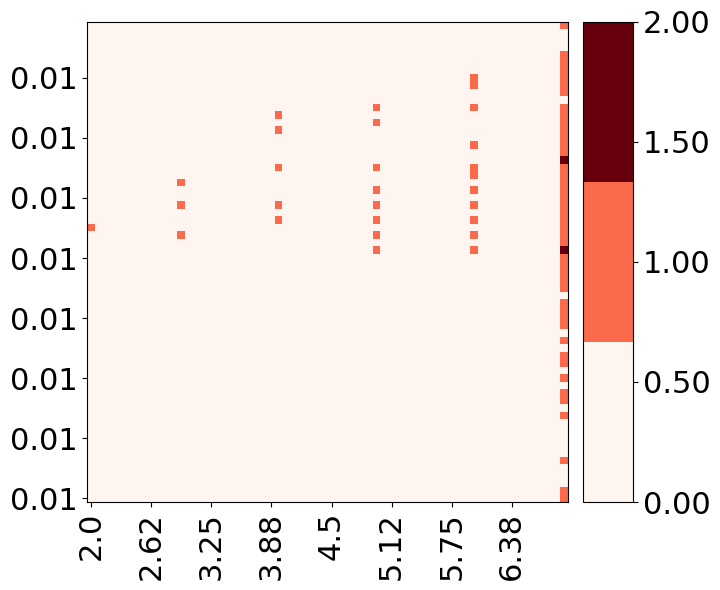

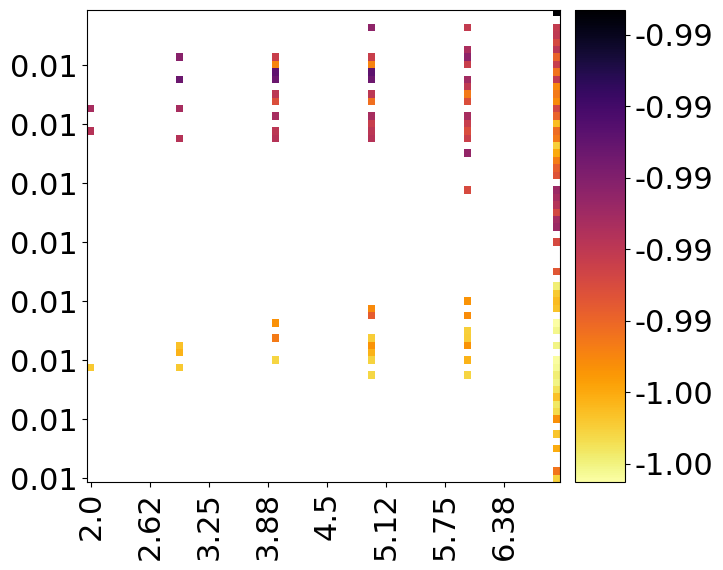

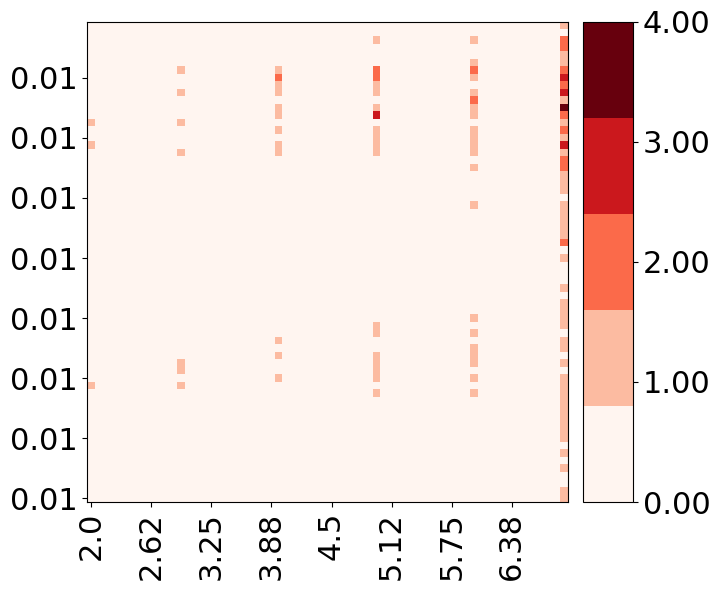

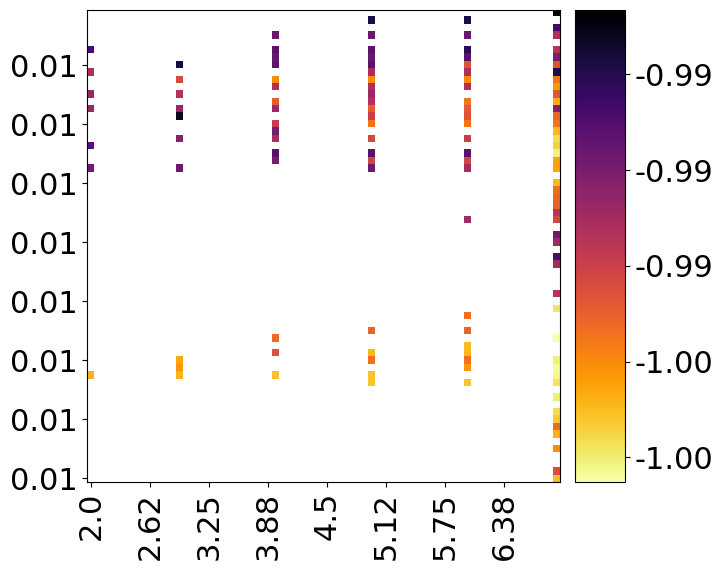

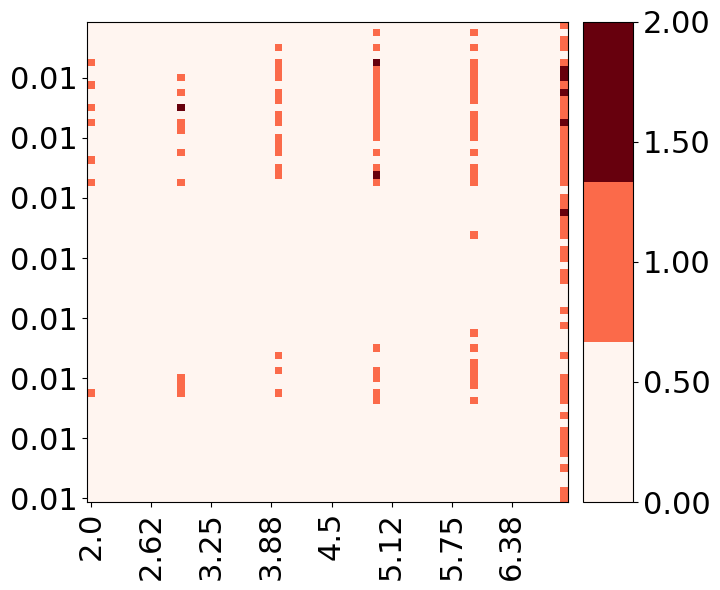

In [99]:
main(["",
    "20230904_0000",
    "20230904_0000",
    6,
    7,
    5,
    3,
    "input_relax_1e2"
])

In [100]:
# if __name__ == "__main__":
#     args = sys.argv
#     sys.exit(main(args))

(2023/7/26)<br>
„Éª„É´„Éº„Éó„ÅÆÂéüÂûã„Åå„Åß„Åç„Åü„ÅÆ„Åß„ÅØÔºü<br>
„ÉªÂÆüË°å„Å´Â∞ë„ÄÖÊôÇÈñì„Åå„Åã„Åã„Çã„ÅÆ„Åß„ÄÅÂÆå‰∫ÜÈÄöÁü•„É°„Éº„É´„ÇíÈÄÅ„Çã„Éó„É≠„Ç∞„É©„É†„ÇÇ‰Ωú„Å£„Å¶„Åä„ÅÑ„Åü„ÄÇ

In [101]:
# loop_num=3„ÅßÂÆüË°åÊôÇ„ÄÅloop1„Å´ÂÖ•„Çç„ÅÜ„Å®„Åô„Çã„Å®„Éª„Éª„Éª
# make_model.py„ÅÆmake_model_for_loop(datasets_dirpath,results_dirpath)„Å´„Å¶„ÄÅ
# TypeError: cannot unpack non-iterable NoneType object
# „Å®„ÅÑ„ÅÜ„Ç®„É©„Éº„ÅåÂá∫„Çã„ÅÆ„Å†„Åå„ÄÅÊâãÂãï„Åßmake_model_for_loop„ÇíÂÆüË°å„Åô„Çã„Å®„Åß„Åç„Å¶„Åó„Åæ„ÅÜ„ÄÇ

(2023/7/27)<br>
„Éª„Å≤„Å®„Åæ„Åö„ÅÆ„É´„Éº„ÉóÂÆüË°å„Å´ÊàêÂäü„ÄÇ<br>
„ÉªÊúÄÂæå„Å´1„Å§‰ΩôË®à„Å™„Éï„Ç©„É´„ÉÄ„Åå„Åß„Åç„Å¶„Åó„Åæ„ÅÜ„ÅÆ„ÅØ„ÅîÊÑõÂ¨å„ÄÇ